<a href="https://colab.research.google.com/github/ssawant/TensorFlow-in-Practice/blob/main/C3W4_NLP_Reading_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-12-27 12:01:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.217.5.240, 172.217.164.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-12-27 12:01:23 (106 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [5]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # add 1 for oov token

# print(tokenizer.word_index)
# print(total_words)

In [6]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_grams_sequence = token_list[:i+1]
    input_sequences.append(n_grams_sequence)
# print(input_sequences)
# print(line)

max_sequences_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequences_len, padding='pre'))
# print(input_sequences[1])

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
# print(f"{xs[1]} {labels[1]}")

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
# print(ys[1])
# print(tokenizer.word_index)

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequences_len-1)) # -1 for element use as label ref line 14
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation=tf.nn.softmax))
adam = Adam(lr=0.01)
model.compile(loss=tf.losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)
print(model)

Epoch 1/100
377/377 [==============================] - 12s 9ms/step - loss: 6.8525 - accuracy: 0.0613
Epoch 2/100
377/377 [==============================] - 3s 9ms/step - loss: 5.7538 - accuracy: 0.1088
Epoch 3/100
377/377 [==============================] - 3s 9ms/step - loss: 4.8454 - accuracy: 0.1647
Epoch 4/100
377/377 [==============================] - 3s 9ms/step - loss: 3.8899 - accuracy: 0.2565
Epoch 5/100
377/377 [==============================] - 4s 9ms/step - loss: 3.0297 - accuracy: 0.3572
Epoch 6/100
377/377 [==============================] - 3s 9ms/step - loss: 2.4122 - accuracy: 0.4627
Epoch 7/100
377/377 [==============================] - 4s 9ms/step - loss: 1.9148 - accuracy: 0.5576
Epoch 8/100
377/377 [==============================] - 4s 10ms/step - loss: 1.5531 - accuracy: 0.6360
Epoch 9/100
377/377 [==============================] - 3s 9ms/step - loss: 1.2901 - accuracy: 0.6966
Epoch 10/100
377/377 [==============================] - 4s 9ms/step - loss: 1.1192 - accu

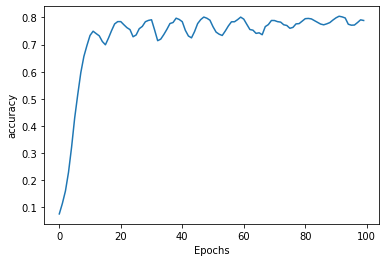

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [11]:
seed_text = "I've got a bad feeling about this"

next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequences_len-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this spreading before the fine grows of the daughter home i did say me nay and i gone and gone the love and liffey and the way for the eyes and free town ship was sailing and last beauty and ive going to make a good sharp axe abusing love the love the love and i sat down to their cursed on the them in leave pardon their eyes twill make thee town of tears it gone with gone by and the leaves they i was a jewel when ruler sun night and the love and you saw gone by love
